### Informações do Grupo 3
- Nomes: Ricardo Endres,
- Turma: 1008
- link dataset: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## Objetivo Principal do Conjunto de Dados

O objetivo principal deste conjunto de dados é fornecer insights sobre os fatores que podem afetar os salários dos profissionais na área de ciência de dados. Ele pode ser usado para responder perguntas como:

* Qual é o salário médio de todos profissionais?
* Qual é o salário médio de pessoas com o cargo de Data Scientist?
* Como o salário médio varia de acordo com o nível de experiência para Data Scientist em empresas de pequeno, médio e grande porte?
* Quais são os salários médios para os cargos de nível júnior, Pleno, Senior e Estecialista?
* Como estão ganhando os Data Scientists que trabalham presencialmente em comparação com os que trabalham de forma hibrida ou 100% de forma remota?

### Importância para as Empresas

* Será que conseguimos predizer, conforme as características dadas, se o perfil do profissional se encaixa na profissão Data Scientist? 
  * Esta informação seria interessante para ajustar os perfis dos profissionais dentro das empresas.


* Se o profissional ocupa o cargo de Data Scientist, conforme suas características, ele estaria na faixa salarial correta?
  * Esta informação seria interessante para ajustar valores de salários conforme as características do profissional, dentro das empresas.


In [1]:
# importando as principais bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregando os dados
df_original = pd.read_csv('ds_salaries.csv')

### Analises iniciais

In [3]:
df_original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Mais informações sobre o Dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
# Contando os nulos, no caso nao há
df_original.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Legenda - Descrição das colunas
* <b>work_year</b>: O nível salarial no ano específico em que foi pago.
* <b>experience_level</b>: O nível de experiência do funcionário
* <b>Employment_type</b>: O tipo de emprego
* <b>job_title</b>: A função/cargo do funcionário
* <b>salary</b>: o valor total do salário bruto
* <b>salary_currency</b>: A moeda do salário pago
* <b>salary_in_usd</b>: O salário em dólares americanos
* <b>Employee_residence</b>: País de residência do funcionário
* <b>remote_ratio</b>: A taxa de trabalho realizado remotamente
* <b>company_location</b>: O país onde fica a sede da empresa
* <b>company_size</b>: Tamanho da empresa com base no número de pessoas que trabalharam para a empresa*

**Tratamento dos dados**

**Para tornar mais legível ao cliente resolvi traduzir o dataset**

In [6]:
# Dicionário de tradução de rótulos dos índices
traducao_indices = {
    "work_year": "ano_de_trabalho",
    "experience_level": "nivel_de_experiencia",
    "employment_type": "tipo_de_emprego",
    "job_title": "cargo",
    "salary": "salario",
    "salary_currency": "moeda_do_salario",
    "salary_in_usd": "salario_em_usd",
    "employee_residence": "residencia_do_funcionario",
    "remote_ratio": "proporcao_remota",
    "company_location": "localizacao_da_empresa",
    "company_size": "tamanho_da_empresa"
}

In [7]:
# Traduzindo conteúdo
df_traducao = df_original.copy()

df_traducao = df_traducao.rename(columns=traducao_indices)
# Traduzindo as colunas que consideramos necessárias
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('SE','Senior')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('MI','Pleno')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('EN','Junior')
df_traducao['nivel_de_experiencia']=df_traducao['nivel_de_experiencia'].replace('EX','Especialista')

df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('S','Pequena')
df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('L','Grande')
df_traducao['tamanho_da_empresa']=df_traducao['tamanho_da_empresa'].replace('M','Media')

df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('FT','Tempo Integral')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('CT','Contrato')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('FL','Freelance')
df_traducao['tipo_de_emprego']=df_traducao['tipo_de_emprego'].replace('PT','Meio Período')
df_traducao.head()

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
0,2023,Senior,Tempo Integral,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Grande
1,2023,Pleno,Contrato,ML Engineer,30000,USD,30000,US,100,US,Pequena
2,2023,Pleno,Contrato,ML Engineer,25500,USD,25500,US,100,US,Pequena
3,2023,Senior,Tempo Integral,Data Scientist,175000,USD,175000,CA,100,CA,Media
4,2023,Senior,Tempo Integral,Data Scientist,120000,USD,120000,CA,100,CA,Media


In [8]:
# Verificando mais detalhes dos dados com o describe transposto
df_traducao.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ano_de_trabalho,3755.0,NaN,NaN,NaN,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
nivel_de_experiencia,3755,4,Senior,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tipo_de_emprego,3755,4,Tempo Integral,3718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cargo,3755,93,Data Engineer,1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario,3755.0,NaN,NaN,NaN,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
moeda_do_salario,3755,20,USD,3224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_em_usd,3755.0,NaN,NaN,NaN,137570.38988,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
residencia_do_funcionario,3755,78,US,3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
proporcao_remota,3755.0,NaN,NaN,NaN,46.271638,48.58905,0.0,0.0,0.0,100.0,100.0
localizacao_da_empresa,3755,72,US,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Definindo padrão de cores.
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [10]:
# top 10 de Cargos com a maior quantidade de registros
top_10_titulos = df_traducao['cargo'].value_counts().head(10)

# Mostrando o resultado
print(top_10_titulos)

cargo
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64


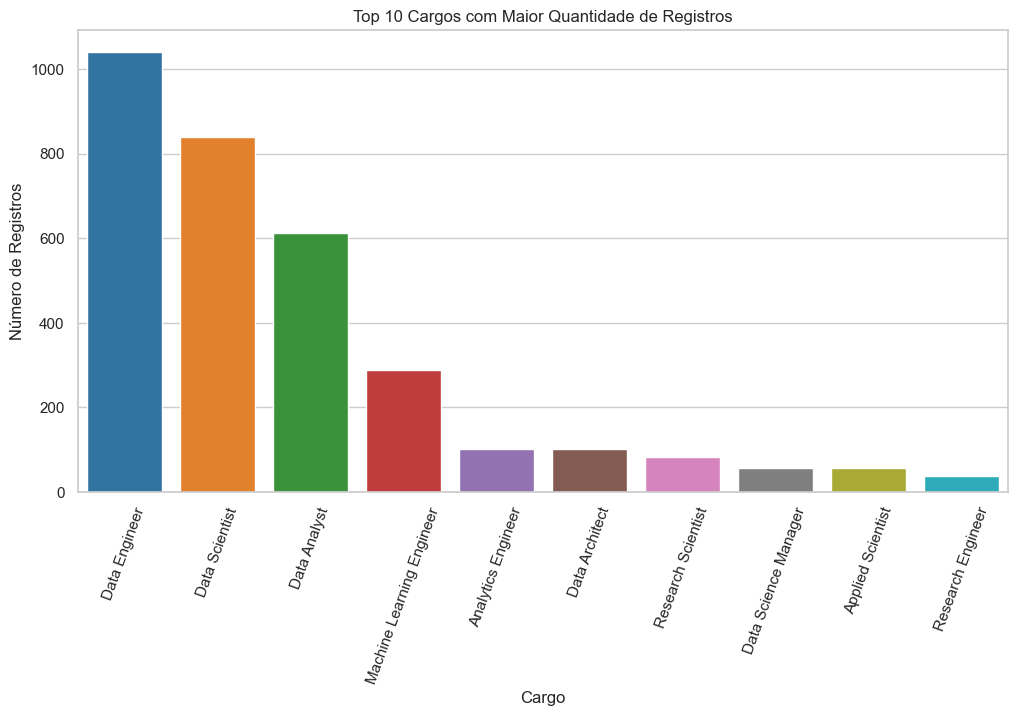

In [155]:
# top 10 de Cargos com a maior quantidade de registros
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_titulos.values, x=top_10_titulos.index, palette='tab10')
plt.title('Top 10 Cargos com Maior Quantidade de Registros')
plt.xticks(rotation=70)
plt.xlabel('Cargo')
plt.ylabel('Número de Registros')
plt.show()

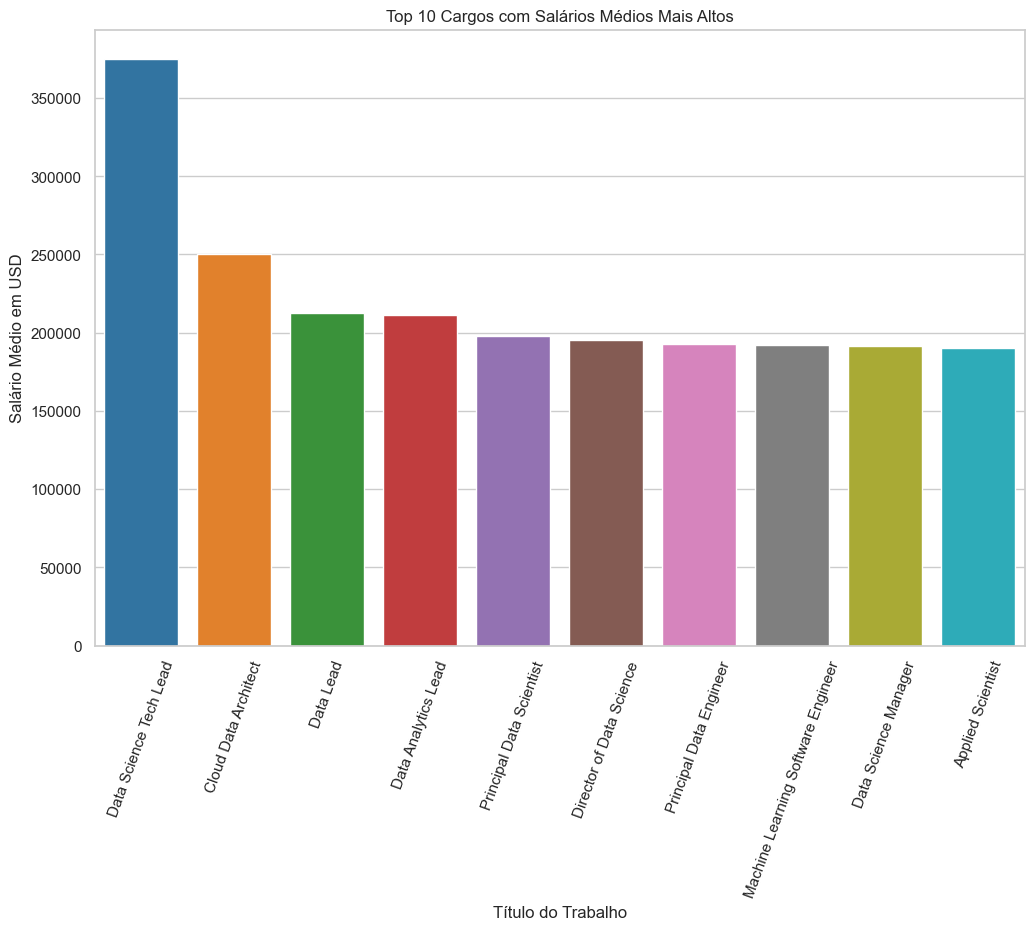

In [154]:
# Top 10 Cargos com Salários Médios Mais Altos
salarios_por_job_title= df_original.groupby('job_title')['salary_in_usd'].mean()
top_10_salarios = salarios_por_job_title.nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_salarios.values, x=top_10_salarios.index, palette="tab10")
plt.title('Top 10 Cargos com Salários Médios Mais Altos')
plt.xticks(rotation=70)
plt.xlabel('Cargo')
plt.ylabel('Salário Médio em USD')
plt.show()

In [13]:
# Filtrando somente detalhes do cargo que contém 'Data Scientist e Data Science'
data_scientist_df = df_traducao[df_traducao['cargo'].str.contains('Data Scientist|Data Science', case=False)]
data_scientist_df

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
0,2023,Senior,Tempo Integral,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Grande
3,2023,Senior,Tempo Integral,Data Scientist,175000,USD,175000,CA,100,CA,Media
4,2023,Senior,Tempo Integral,Data Scientist,120000,USD,120000,CA,100,CA,Media
7,2023,Senior,Tempo Integral,Data Scientist,219000,USD,219000,CA,0,CA,Media
8,2023,Senior,Tempo Integral,Data Scientist,141000,USD,141000,CA,0,CA,Media
...,...,...,...,...,...,...,...,...,...,...,...
3746,2021,Pleno,Tempo Integral,Data Scientist,160000,SGD,119059,SG,100,IL,Media
3750,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,100,US,Grande
3751,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,100,US,Grande
3752,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,100,US,Pequena


In [14]:
# Analisando media salarial de quem é Data Science
ds_media_salarios = data_scientist_df
ds_media_salarios = ds_media_salarios[['salario_em_usd']].groupby('salario_em_usd').mean()
ds_media_salarios = ds_media_salarios.sort_values(by='salario_em_usd',ascending=False).reset_index()
ds_media_salarios.describe().T

,count,mean,std,min,25%,50%,75%,max
salario_em_usd,437.0,131484.338673,75351.137335,5679.0,73000.0,127221.0,177500.0,416000.0


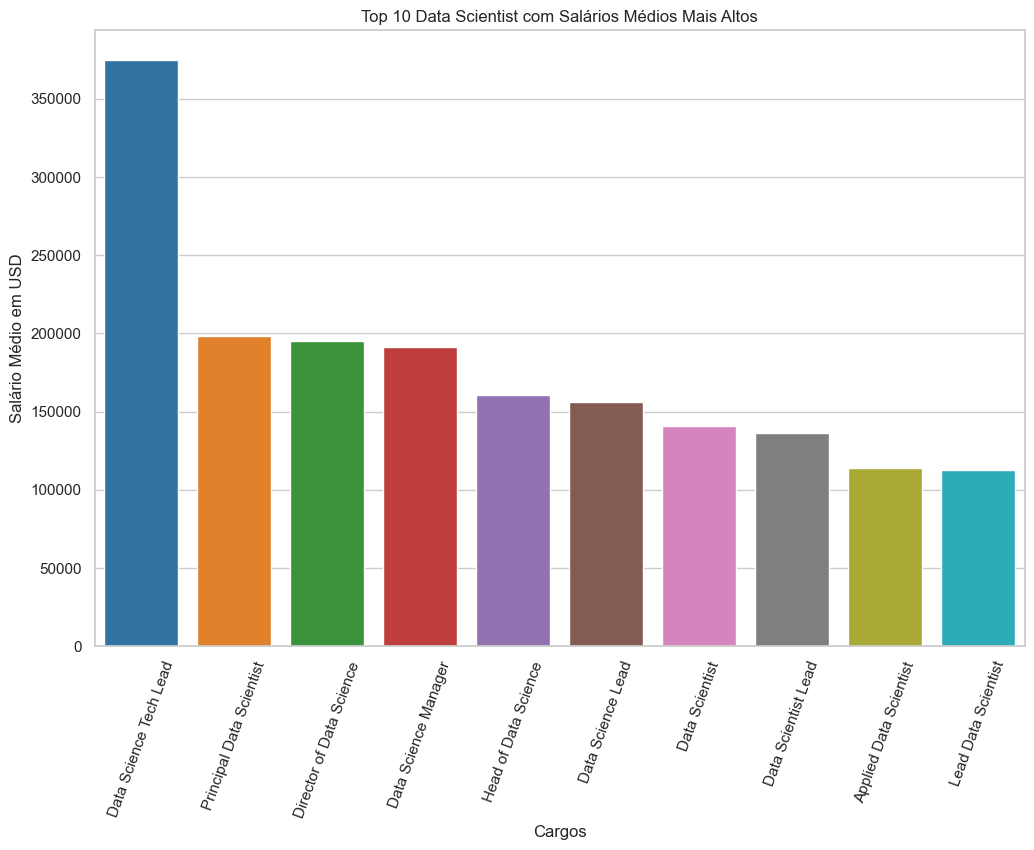

In [156]:
# Top 10 Data Scientist com Salários Médios Mais Altos
salarios_por_job_title= data_scientist_df.groupby('cargo')['salario_em_usd'].mean()
top_10_salarios = salarios_por_job_title.nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_salarios.values, x=top_10_salarios.index, palette="tab10")
plt.title('Top 10 Data Scientist com Salários Médios Mais Altos')
plt.xticks(rotation=70)
plt.ylabel('Salário Médio em USD')
plt.xlabel('Cargos')
plt.show()

In [16]:
# Filtrando somente os detalhes onde 'cargo' NÃO contém 'Data Scientist'
nao_ds = df_traducao[~df_traducao['cargo'].str.contains('Data Scientist|Data Science Tech Lead', case=False)]
nao_ds

,ano_de_trabalho,nivel_de_experiencia,tipo_de_emprego,cargo,salario,moeda_do_salario,salario_em_usd,residencia_do_funcionario,proporcao_remota,localizacao_da_empresa,tamanho_da_empresa
1,2023,Pleno,Contrato,ML Engineer,30000,USD,30000,US,100,US,Pequena
2,2023,Pleno,Contrato,ML Engineer,25500,USD,25500,US,100,US,Pequena
5,2023,Senior,Tempo Integral,Applied Scientist,222200,USD,222200,US,0,US,Grande
6,2023,Senior,Tempo Integral,Applied Scientist,136000,USD,136000,US,0,US,Grande
11,2023,Senior,Tempo Integral,Data Analyst,130000,USD,130000,US,100,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
3747,2021,Pleno,Tempo Integral,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,Grande
3748,2021,Pleno,Tempo Integral,Data Engineer,24000,EUR,28369,MT,50,MT,Grande
3749,2021,Senior,Tempo Integral,Data Specialist,165000,USD,165000,US,100,US,Grande
3753,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,100,US,Grande


In [17]:
# Analisando media salarial de quem nao é DS
nao_ds_media_salarios = nao_ds
nao_ds_media_salarios = nao_ds_media_salarios[['salario_em_usd']].groupby('salario_em_usd').mean()
nao_ds_media_salarios = nao_ds_media_salarios.sort_values(by='salario_em_usd',ascending=False).reset_index()
nao_ds_media_salarios.describe().T

,count,mean,std,min,25%,50%,75%,max
salario_em_usd,854.0,132592.900468,79086.877928,5132.0,70264.5,123624.0,183232.5,450000.0


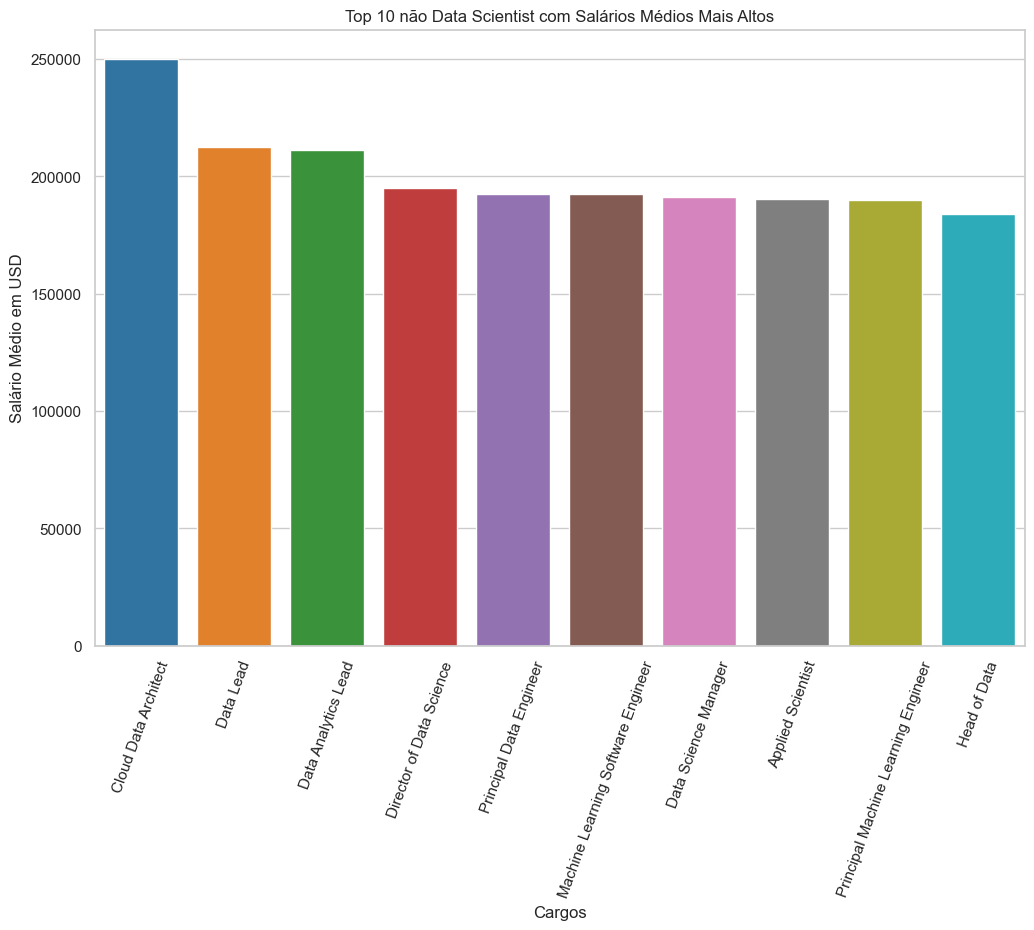

In [157]:
# Top 10 de nao Data Scientists com Salários Médios Mais Altos
salarios_por_job_title= nao_ds.groupby('cargo')['salario_em_usd'].mean()
top_10_salarios = salarios_por_job_title.nlargest(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_salarios.values, x=top_10_salarios.index, palette="tab10")
plt.title('Top 10 não Data Scientist com Salários Médios Mais Altos')
plt.xticks(rotation=70)
plt.ylabel('Salário Médio em USD')
plt.xlabel('Cargos')
plt.show()

Como podemos observar na imagem acima, em média, os profissionais recebe um salário anual em torno de 127 mil dólares. Enquanto "Não DS" ganham em media 132 mil dólares.

In [19]:
# Analisando media salarial dos Data Science em relação ao nível de experiencia
nivel_de_experiencia = data_scientist_df
nivel_de_experiencia = nivel_de_experiencia[['nivel_de_experiencia','salario_em_usd']].groupby('nivel_de_experiencia').mean()
nivel_de_experiencia = nivel_de_experiencia.sort_values(by='salario_em_usd',ascending=False).reset_index()
nivel_de_experiencia

,nivel_de_experiencia,salario_em_usd
0,Especialista,196161.676471
1,Senior,160489.252874
2,Pleno,95825.095745
3,Junior,71533.260870


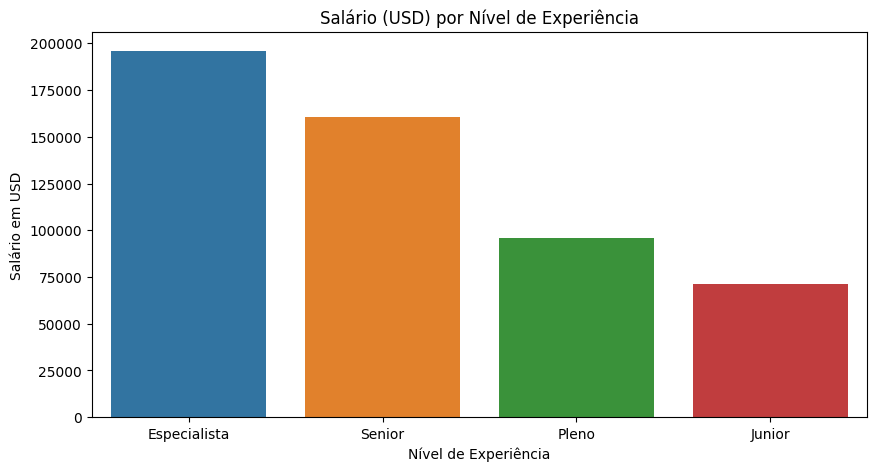

In [20]:
# Analisando detalhes da distribuição da media dos salários em relação ao nível de experiencia
plt.figure(figsize = (10, 5))
sns.barplot(x='nivel_de_experiencia', y='salario_em_usd', palette='tab10', data=nivel_de_experiencia)
plt.title('Salário (USD) por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.show()

In [21]:
# Analisando media salarial em relação a Proporcão de Trabalho Remoto
proporção_remoto = data_scientist_df
proporção_remoto = proporção_remoto[['proporcao_remota','salario_em_usd']].groupby('proporcao_remota').mean()
proporção_remoto = proporção_remoto.sort_values(by='salario_em_usd',ascending=False).reset_index()
proporção_remoto['Categoria do Remoto'] = proporção_remoto['proporcao_remota'].apply(lambda x: 'Presencial' if x == 0 else ('Hibrido' if x == 50 else 'Remoto'))

proporção_remoto.head()


,proporcao_remota,salario_em_usd,Categoria do Remoto
0,0,148733.089027,Presencial
1,100,147690.609589,Remoto
2,50,72641.833333,Hibrido


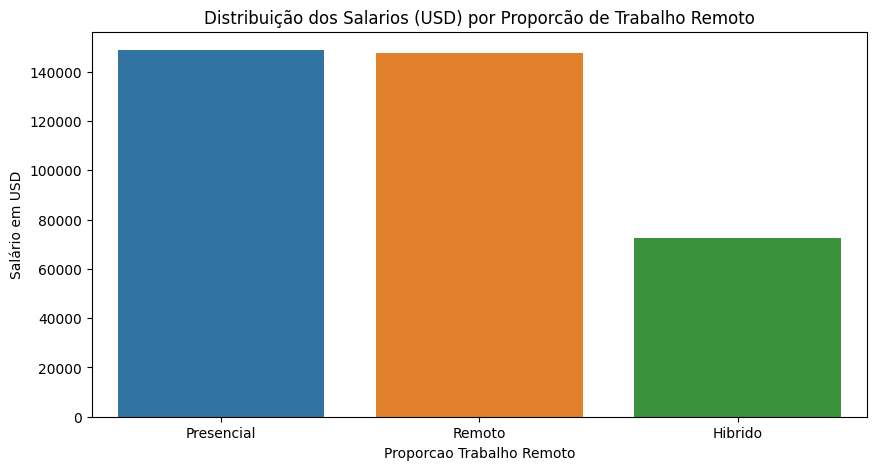

In [22]:
# Analisando distribuição do Salario médio em (USD) por Proporcão de Trabalho Remoto

plt.figure(figsize = (10, 5))

sns.barplot(x='Categoria do Remoto', y='salario_em_usd', palette='tab10', data=proporção_remoto)
plt.title('Distribuição dos Salarios (USD) por Proporcão de Trabalho Remoto')
plt.xlabel('Proporcao Trabalho Remoto')
plt.ylabel('Salário em USD')
plt.show()

Nesta imagem acima podemos ver que, tem trabalha de forma hibrida, tende a receber menos, enquanto quem trabalha presencial e remoto recebem em média os mesmos valores.

In [23]:
# Analisando media salarial em relação ao nivel de experiencia
nivel_de_experiencia = data_scientist_df
nivel_de_experiencia = nivel_de_experiencia[['nivel_de_experiencia','salario_em_usd']].groupby('nivel_de_experiencia').mean()
nivel_de_experiencia = nivel_de_experiencia.sort_values(by='salario_em_usd',ascending=False).reset_index()
nivel_de_experiencia

,nivel_de_experiencia,salario_em_usd
0,Especialista,196161.676471
1,Senior,160489.252874
2,Pleno,95825.095745
3,Junior,71533.260870


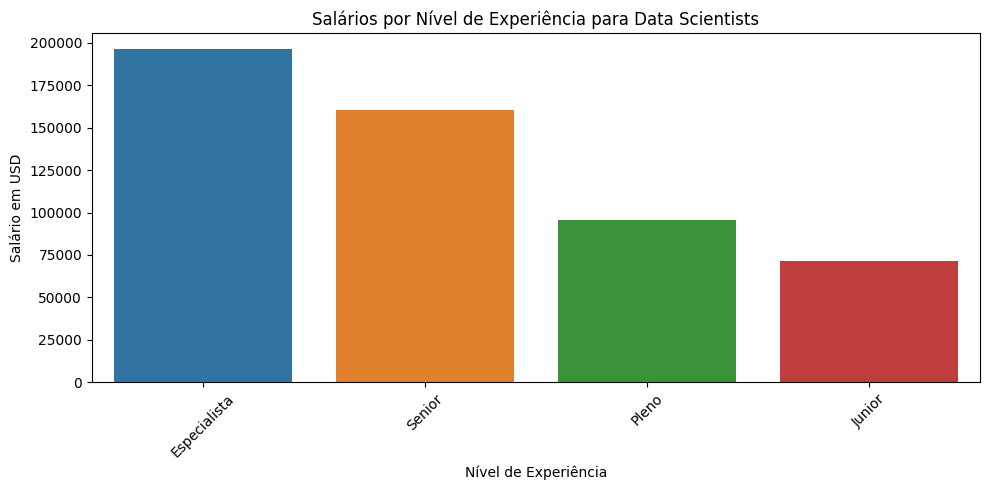

In [24]:
# Analisando detalhes de forma visual media salarial em relação ao nivel de experiencia
plt.figure(figsize=(10, 5))
sns.barplot(x='nivel_de_experiencia', y='salario_em_usd', palette='tab10', data=nivel_de_experiencia)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.title('Salários por Nível de Experiência para Data Scientists')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Na imagem acima, temos uma visão mais detalhada do salário médio por nível de experiência.

In [25]:
# Analisando media salarial em relação ao tipo de emprego
media_tipo_de_emprego = data_scientist_df
media_tipo_de_emprego = media_tipo_de_emprego[['tipo_de_emprego','salario_em_usd']].groupby('tipo_de_emprego').mean()
media_tipo_de_emprego = media_tipo_de_emprego.sort_values(by='salario_em_usd',ascending=False).reset_index()
media_tipo_de_emprego

,tipo_de_emprego,salario_em_usd
0,Contrato,260500.000000
1,Tempo Integral,143188.849134
2,Freelance,100000.000000
3,Meio Período,77223.000000


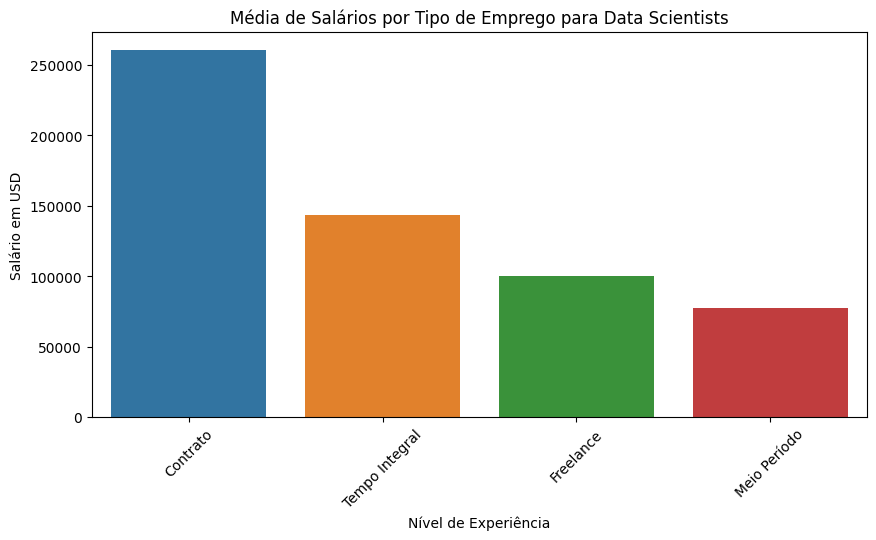

In [26]:
# Analisando detalhes da media salarial em relação ao tipo de emprego
plt.figure(figsize=(10, 5))
sns.barplot(x='tipo_de_emprego', y='salario_em_usd', palette='tab10', data=media_tipo_de_emprego)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário em USD')
plt.title('Média de Salários por Tipo de Emprego para Data Scientists')
plt.xticks(rotation=45)

plt.show()

In [27]:
# Analisando media salarial em relação ao tamanho_da_empresa
media_tamanho_empresa = data_scientist_df
media_tamanho_empresa = media_tamanho_empresa[['tamanho_da_empresa','salario_em_usd']].groupby('tamanho_da_empresa').mean()
media_tamanho_empresa = media_tamanho_empresa.sort_values(by='salario_em_usd',ascending=False).reset_index()
media_tamanho_empresa

,tamanho_da_empresa,salario_em_usd
0,Media,150917.720844
1,Grande,116869.471831
2,Pequena,79122.615385


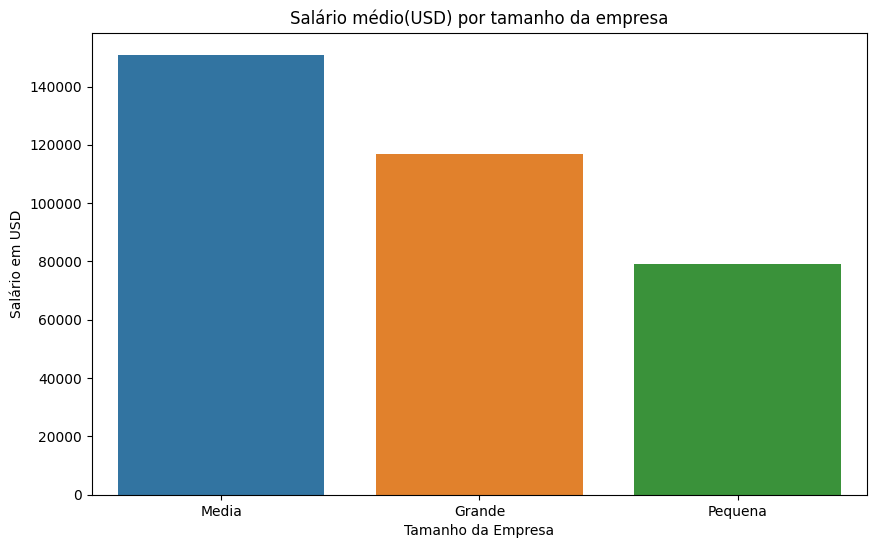

In [28]:
# Analisando media salarial em relação ao tamanho_da_empresa
plt.figure(figsize=(10, 6))
sns.barplot(x='tamanho_da_empresa', y='salario_em_usd', palette='tab10', data=media_tamanho_empresa)
plt.title('Salário médio(USD) por tamanho da empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Salário em USD')
plt.show()

Text(0, 0.5, 'Count')

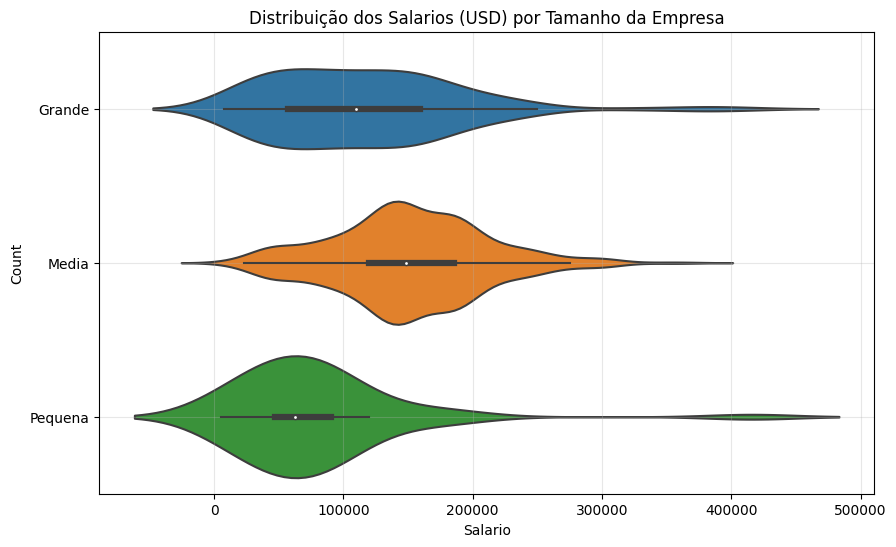

In [29]:
# Distribuição dos Salarios (USD)de Data Science por Tamanho da Empresa
plt.figure(figsize = (10, 6))

sns.violinplot(x = 'salario_em_usd', y = 'tamanho_da_empresa', palette='tab10', data = data_scientist_df)

plt.grid(alpha = 0.3)
plt.title('Distribuição dos Salarios (USD) por Tamanho da Empresa')
plt.xlabel('Salario')
plt.ylabel('Count')

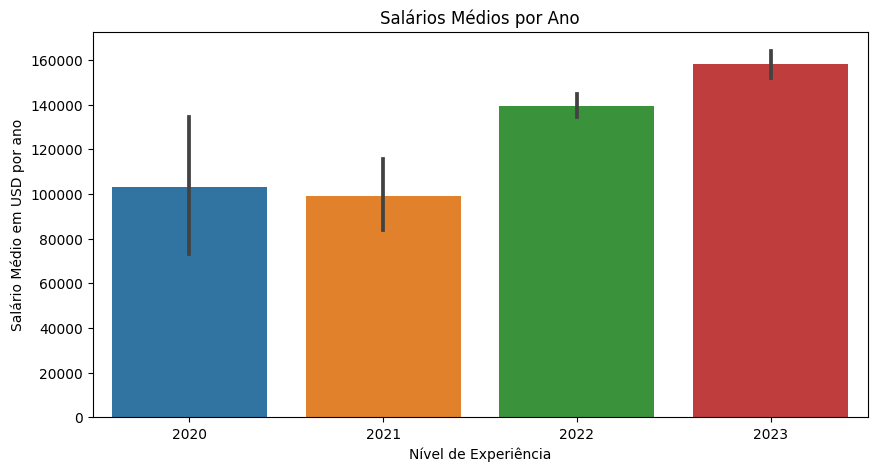

In [30]:
#Salários dos Data Scientists por Ano:
plt.figure(figsize=(10, 5))
sns.barplot(x='ano_de_trabalho', y='salario_em_usd', palette='tab10', data=data_scientist_df)
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio em USD por ano')
plt.title('Salários Médios por Ano')
plt.xticks(rotation=0)

plt.show()


**Preparando os dados para modelos:**

In [31]:
# Verificando a proporção da job_title
df_original['job_title'].value_counts()


job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [32]:
df = df_original.copy()

In [33]:
# Dropando a target das nossas features
X = df.drop(['job_title'], axis = 1)

In [34]:
# Fazendo um get_dummies para colunar as nossas variáveis categóricas
X_with_dummies = pd.get_dummies(X, prefix_sep = '_', columns=['experience_level',
                                                              'employment_type',
                                                              'employee_residence',
                                                              'salary_currency',
                                                              'company_location',
                                                              'company_size'])

In [35]:
# transformando a target
y_target = np.where(df['job_title'] == 'Data Scientist', 1, 0)
y_target

array([0, 0, 0, ..., 1, 0, 0])

In [36]:
#Separando em train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_dummies,
                                                    y_target,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify = y_target)

In [37]:
from sklearn.tree import DecisionTreeClassifier
# Instancie o modelo

model = DecisionTreeClassifier(random_state = 42)
# Fit do Modelo

model.fit(X_train, y_train)
# Predict do Modelo

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       875
           1       0.44      0.35      0.39       252

    accuracy                           0.76      1127
   macro avg       0.63      0.61      0.62      1127
weighted avg       0.74      0.76      0.74      1127



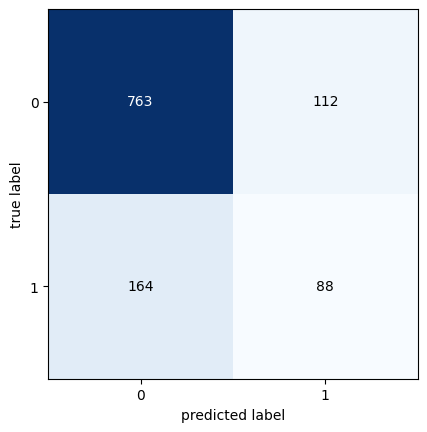

In [38]:
# importando bibliotecas
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


#patamares = ["Patamar 1", "Patamar 2", "Patamar 3", "Patamar 4", "Patamar 5", "Patamar 6", "Patamar 7", "Patamar 8", "Patamar 9", "Patamar 10"]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm,)
plt.show()

In [39]:
# importando bibliotecas
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=80,  # Número de árvores
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       875
           1       0.50      0.34      0.40       252

    accuracy                           0.78      1127
   macro avg       0.66      0.62      0.63      1127
weighted avg       0.75      0.78      0.76      1127



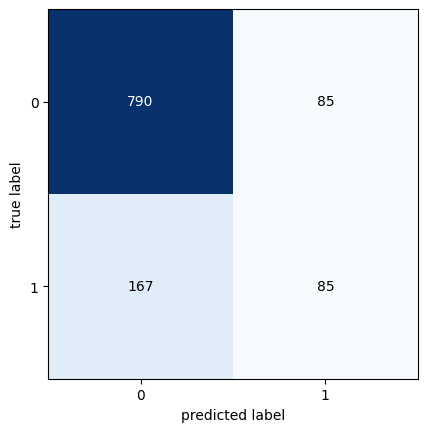

In [40]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [41]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(
    n_estimators=500,
    random_state=42
    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       875
           1       0.59      0.13      0.21       252

    accuracy                           0.79      1127
   macro avg       0.69      0.55      0.54      1127
weighted avg       0.75      0.79      0.73      1127



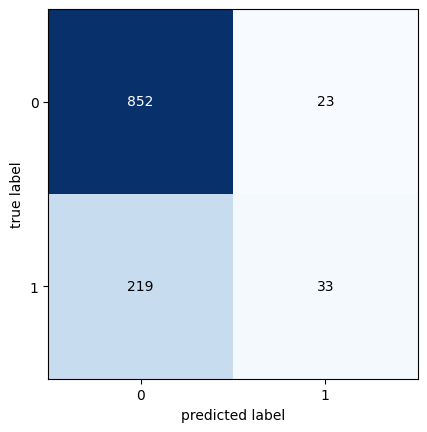

In [42]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       875
           1       0.64      0.07      0.13       252

    accuracy                           0.78      1127
   macro avg       0.71      0.53      0.50      1127
weighted avg       0.75      0.78      0.71      1127



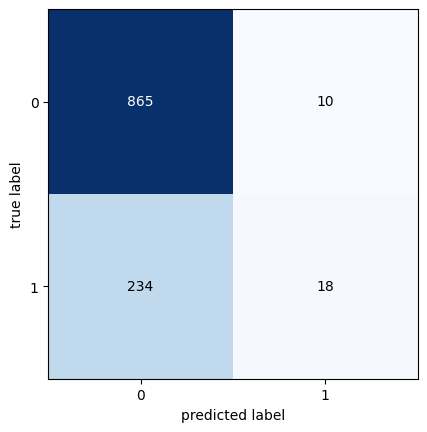

In [44]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [45]:
# Importando o XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       875
           1       0.50      0.25      0.34       252

    accuracy                           0.78      1127
   macro avg       0.66      0.59      0.60      1127
weighted avg       0.74      0.78      0.75      1127



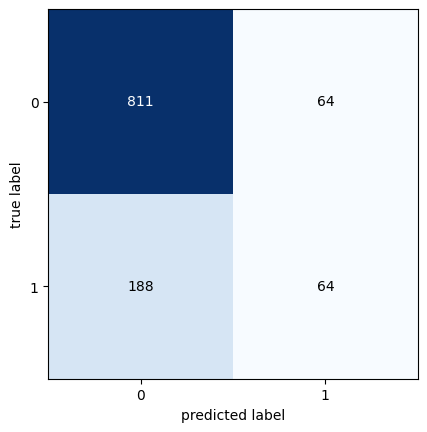

In [46]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

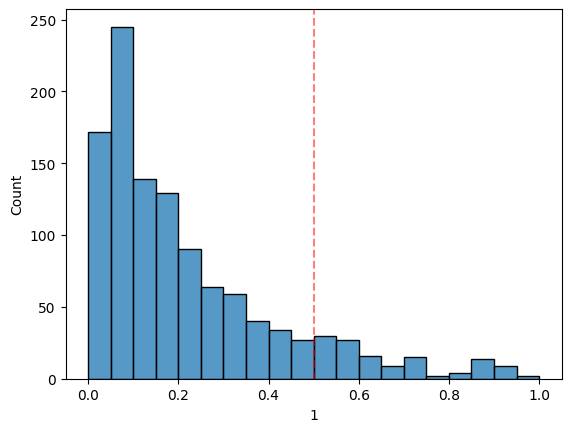

In [47]:
# Probabilidade de predizer se uma amostra pertence a classe 1
sns.histplot(pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])[1], bins=np.arange(0, 1.05, 0.05))

plt.axvline(0.5, ls='--', color='red', alpha=0.5)

In [48]:
data = pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])
data['target'] = y_test
data['limiar_0.5'] = data[1].apply(lambda x: 1 if x >= 0.5 else 0, 1)
data['limiar_0.9'] = data[1].apply(lambda x: 1 if x >= 0.9 else 0, 1)
data['limiar_0.3'] = data[1].apply(lambda x: 1 if x >= 0.3 else 0, 1)

In [49]:
# Observando se há melhoria do modelo
print('limiar: 0.3')
display((data['target'] == data['limiar_0.3']).value_counts())

print('-'*42)
print('limiar: 0.5')
display((data['target'] == data['limiar_0.5']).value_counts())

print('-'*42)
print('limiar: 0.9')
display((data['target'] == data['limiar_0.9']).value_counts())

limiar: 0.3


True     809
False    318
Name: count, dtype: int64

------------------------------------------
limiar: 0.5


True     875
False    252
Name: count, dtype: int64

------------------------------------------
limiar: 0.9


True     880
False    247
Name: count, dtype: int64

[LightGBM] [Info] Number of positive: 588, number of negative: 2040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of data points in the train set: 2628, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223744 -> initscore=-1.243978
[LightGBM] [Info] Start training from score -1.243978
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       875
           1       0.61      0.21      0.32       252

    accuracy                           0.79      1127
   macro avg       0.71      0.59      0.60      1127
weighted avg       0.76      0.79      0.75      1127



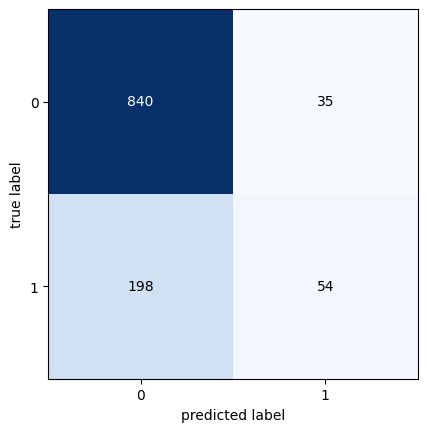

In [50]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(random_state=42)

model_lgb.fit(X_train, y_train)

y_pred = model_lgb.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

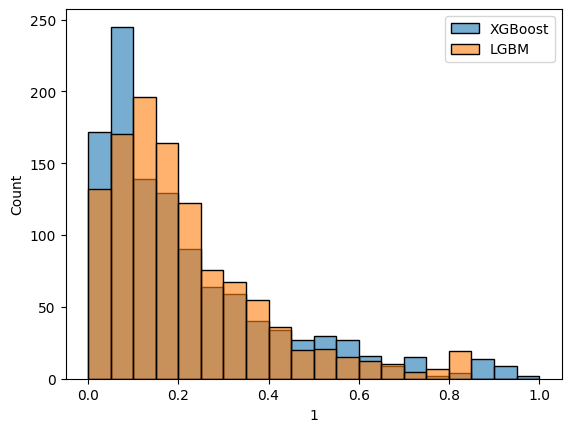

In [51]:
predict_xgb = pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])[1]
predict_lgb = pd.DataFrame(model_lgb.predict_proba(X_test), columns=[0, 1])[1]

bins = np.arange(0, 1.05, 0.05)
sns.histplot(predict_xgb, bins=bins, alpha=0.6, label='XGBoost')
sns.histplot(predict_lgb, bins=bins, alpha=0.6, label='LGBM')

plt.legend()
# plt.axvline(0.9, ls='--', color='red', alpha=0.5)

In [52]:
from sklearn import metrics


def test_models_plot_roc_auc_curve(
        model_list,
        X_train,
        X_test,
        y_train,
        y_test):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
    """

    response = {}
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)


        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

        model_name = mdl.get('model_name')
        accuracy = metrics.accuracy_score(y_test, y_predict)
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        precision = metrics.precision_score(y_test, y_predict, average='weighted')
        recall = metrics.recall_score(y_test, y_predict, average='weighted')
        f1_score = metrics.f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))

        print(f"Model      : {model_name}")
        print(f"Accuracy   : {accuracy:.4f} ")
        print(f"Precision  : {precision:.4f}")
        print(f"Recall     : {recall:.4f}")
        print(f"F1 - Score : {f1_score:.4f} ")
        print(f"ROC - AUC  : {auc:.4f} ")
        print("======================")

        response[mdl.get('model_name')]  = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "auc": auc,
        }


    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response

In [53]:
from lightgbm.sklearn import LGBMClassifier

random_seed = 42

list_models = [
  {
      "model_name": "Decision Tree",
      "estimator": DecisionTreeClassifier(random_state=random_seed)
  },
  {
      "model_name": "Random Forest",
      "estimator": RandomForestClassifier(random_state=random_seed)
  },
  {
      "model_name": "AdaBoost",
      "estimator": AdaBoostClassifier(random_state=random_seed)
  },
  {
      "model_name": "GradientBoosting",
      "estimator": GradientBoostingClassifier(random_state=random_seed)
  },
  {
      "model_name": "XGBoost",
      "estimator": XGBClassifier(random_state=random_seed)
  },
  {
      "model_name": "LightGBM",
      "estimator": lgb.LGBMClassifier(random_state=random_seed)
  },
  {
      "model_name": "LightGBM - Opt",
      "estimator": lgb.LGBMClassifier(random_state=random_seed, num_leaves=17, min_child_samples= 10)
  }
]

Model      : Decision Tree
Accuracy   : 0.7551 
Precision  : 0.7374
Recall     : 0.7551
F1 - Score : 0.7445 
ROC - AUC  : 0.6106 
Model      : Random Forest
Accuracy   : 0.7746 
Precision  : 0.7511
Recall     : 0.7746
F1 - Score : 0.7583 
ROC - AUC  : 0.6189 
Model      : AdaBoost
Accuracy   : 0.7711 
Precision  : 0.6787
Recall     : 0.7711
F1 - Score : 0.6854 
ROC - AUC  : 0.5050 
Model      : GradientBoosting
Accuracy   : 0.7835 
Precision  : 0.7548
Recall     : 0.7835
F1 - Score : 0.7092 
ROC - AUC  : 0.5300 
Model      : XGBoost
Accuracy   : 0.7764 
Precision  : 0.7421
Recall     : 0.7764
F1 - Score : 0.7473 
ROC - AUC  : 0.5904 
[LightGBM] [Info] Number of positive: 588, number of negative: 2040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 570
[LightGBM] [Info] Number of dat

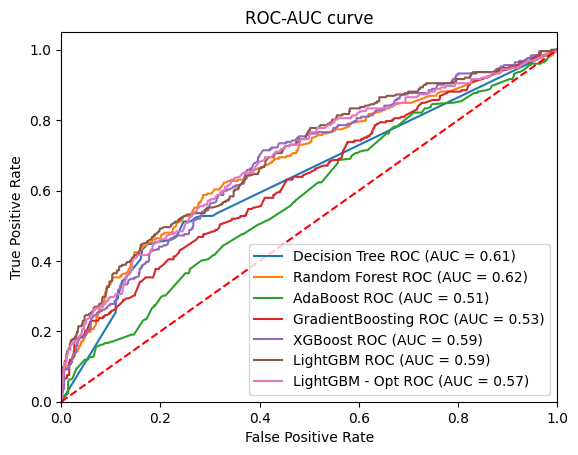

In [54]:
pipeline_response = test_models_plot_roc_auc_curve(
    list_models,
    X_train,
    X_test,
    y_train,
    y_test
)

In [55]:
resp = []
for modelo, modelo_metricas  in pipeline_response.items():
  metricas = []
  metricas.append(modelo)
  for metrica in modelo_metricas.values():
    metricas.append(metrica)
  resp.append(metricas)

In [56]:
metricas_df = pd.DataFrame(resp, columns=['modelo'] + list(pipeline_response['Decision Tree'].keys()))
metricas_df

,modelo,accuracy,precision,recall,f1_score,auc
0,Decision Tree,0.755102,0.737426,0.755102,0.744548,0.610603
1,Random Forest,0.774623,0.751131,0.774623,0.758287,0.618937
2,AdaBoost,0.771074,0.678710,0.771074,0.685372,0.505048
3,GradientBoosting,0.783496,0.754831,0.783496,0.709178,0.530000
4,XGBoost,0.776398,0.742090,0.776398,0.747313,0.590413
5,LightGBM,0.793256,0.763967,0.793256,0.752652,0.587143
6,LightGBM - Opt,0.789707,0.757955,0.789707,0.741553,0.570730


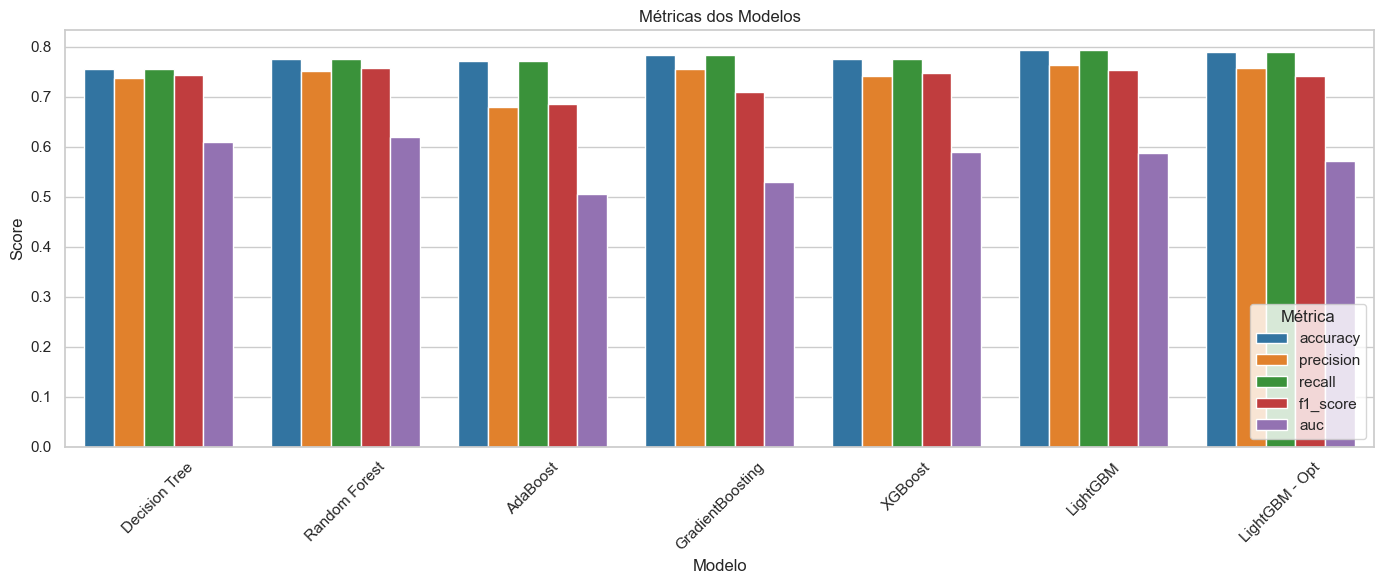

In [57]:
df_melted = pd.melt(metricas_df, id_vars=["modelo"], var_name="metrica", value_name="valor")
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='modelo', y='valor', hue='metrica', palette='tab10')

plt.xticks(rotation=45)
plt.xlabel("Modelo")
plt.ylabel("Score")
plt.title("Métricas dos Modelos")
plt.legend(title="Métrica", loc='lower right')  # Posição da legenda
plt.tight_layout()
plt.show()

In [58]:
# Calculando a média das métricas para cada modelo
metricas_df['media'] = metricas_df[['accuracy', 'precision', 'recall', 'f1_score', 'auc']].mean(axis=1)

# Encontrando o modelo com a melhor média
melhor_modelo = metricas_df.loc[metricas_df['media'].idxmax()]

print("Melhor modelo em média:")
print(melhor_modelo)

Melhor modelo em média:
modelo       LightGBM
accuracy     0.793256
precision    0.763967
recall       0.793256
f1_score     0.752652
auc          0.587143
media        0.738055
Name: 5, dtype: object


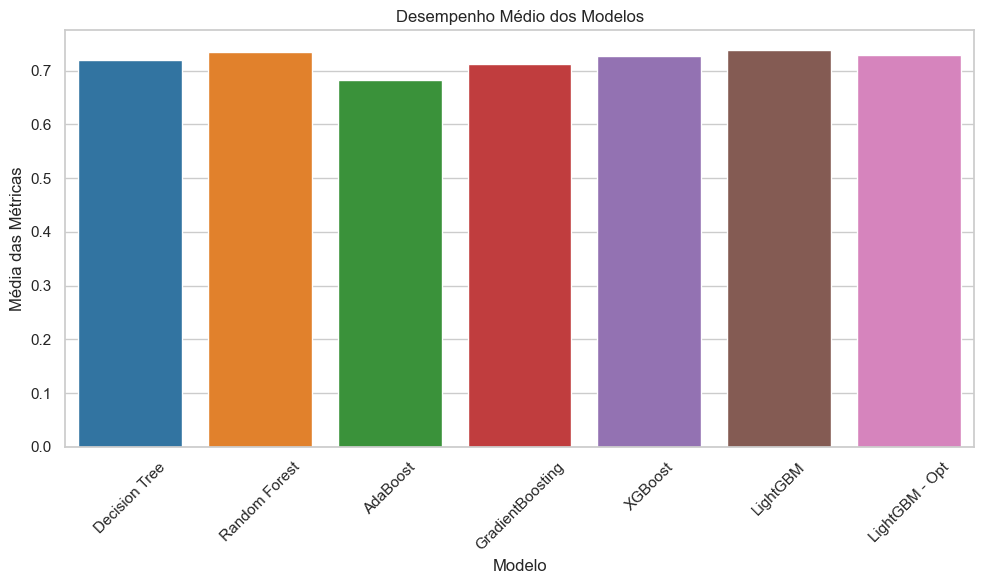

In [59]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(data=metricas_df, x='modelo', y='media', palette='tab10')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.xlabel("Modelo")
plt.ylabel("Média das Métricas")
plt.title("Desempenho Médio dos Modelos")
plt.tight_layout()
plt.show()

# Testando com o LabelEncoder

In [60]:
df = df_original.copy()

In [61]:
# Dropando a target das nossas features
X = df.drop(['job_title'], axis = 1)

In [62]:
# Fazenfo um get_dummies para colunar as nossas variáveis categóricas
X_with = pd.get_dummies(X, prefix_sep = '_', columns=['experience_level',
                                                              'employment_type',
                                                              'employee_residence',
                                                              'salary_currency',
                                                              'company_location',
                                                              'company_size'])

In [63]:
# Transformando os dados com LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols = ['experience_level', 'employment_type','salary_currency','employee_residence','company_location','company_size']
X[cols]=X[cols].apply(LabelEncoder().fit_transform)
X.head()

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,80000,7,85847,26,100,25,0
1,2023,2,0,30000,19,30000,75,100,70,2
2,2023,2,0,25500,19,25500,75,100,70,2
3,2023,3,2,175000,19,175000,11,100,12,1
4,2023,3,2,120000,19,120000,11,100,12,1


In [64]:
X.head().T

,0,1,2,3,4
work_year,2023,2023,2023,2023,2023
experience_level,3,2,2,3,3
employment_type,2,0,0,2,2
salary,80000,30000,25500,175000,120000
salary_currency,7,19,19,19,19
salary_in_usd,85847,30000,25500,175000,120000
employee_residence,26,75,75,11,11
remote_ratio,100,100,100,100,100
company_location,25,70,70,12,12
company_size,0,2,2,1,1


In [65]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
experience_level,3755.0,2.469241,0.906261,0.0,2.0,3.0,3.0,3.0
employment_type,3755.0,1.996538,0.133550,0.0,2.0,2.0,2.0,3.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_currency,3755.0,17.409587,4.062710,0.0,19.0,19.0,19.0,19.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
employee_residence,3755.0,66.149401,19.235212,0.0,75.0,75.0,75.0,77.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0
company_location,3755.0,62.117177,17.495432,0.0,70.0,70.0,70.0,71.0
company_size,3755.0,0.918509,0.392071,0.0,1.0,1.0,1.0,2.0


In [66]:
# transformando a target
y_target = np.where(df['job_title'] == 'Data Scientist', 1, 0)
y_target

array([0, 0, 0, ..., 1, 0, 0])

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_target,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y_target)

In [68]:
from sklearn.tree import DecisionTreeClassifier
# Instancie o modelo

model = DecisionTreeClassifier(random_state = 42)
# Fit do Modelo

model.fit(X_train, y_train)
# Predict do Modelo

y_pred = model.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       875
           1       0.41      0.35      0.38       252

    accuracy                           0.74      1127
   macro avg       0.62      0.60      0.61      1127
weighted avg       0.73      0.74      0.74      1127



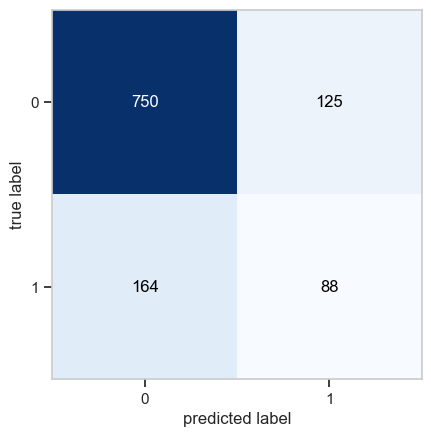

In [69]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


#patamares = ["Patamar 1", "Patamar 2", "Patamar 3", "Patamar 4", "Patamar 5", "Patamar 6", "Patamar 7", "Patamar 8", "Patamar 9", "Patamar 10"]

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm,)
plt.show()

In [70]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=80,  # Número de árvores
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,  # OOB
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       875
           1       0.51      0.34      0.41       252

    accuracy                           0.78      1127
   macro avg       0.67      0.62      0.64      1127
weighted avg       0.76      0.78      0.76      1127



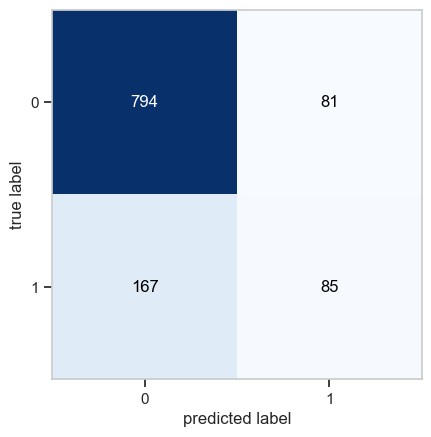

In [71]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [72]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(
    n_estimators=500,
    random_state=42
    )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       875
           1       0.68      0.11      0.18       252

    accuracy                           0.79      1127
   macro avg       0.73      0.55      0.53      1127
weighted avg       0.77      0.79      0.72      1127



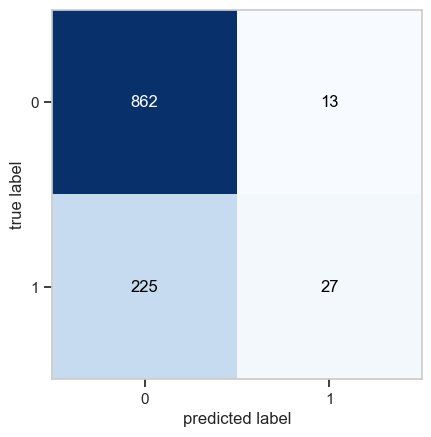

In [73]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       875
           1       0.67      0.12      0.20       252

    accuracy                           0.79      1127
   macro avg       0.73      0.55      0.54      1127
weighted avg       0.77      0.79      0.73      1127



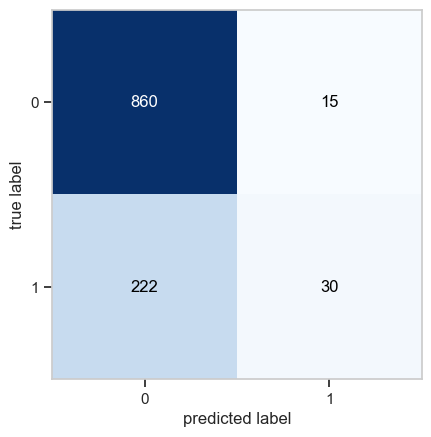

In [75]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

In [76]:
# Importando o XGBoost
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       875
           1       0.52      0.25      0.33       252

    accuracy                           0.78      1127
   macro avg       0.66      0.59      0.60      1127
weighted avg       0.75      0.78      0.75      1127



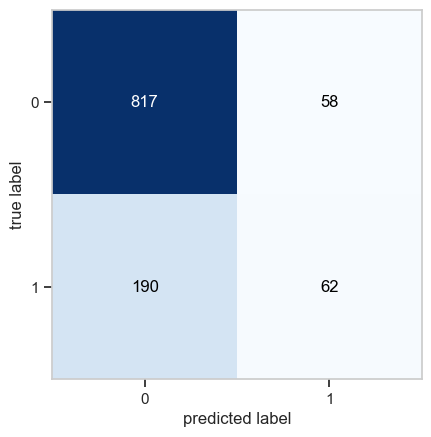

In [77]:
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

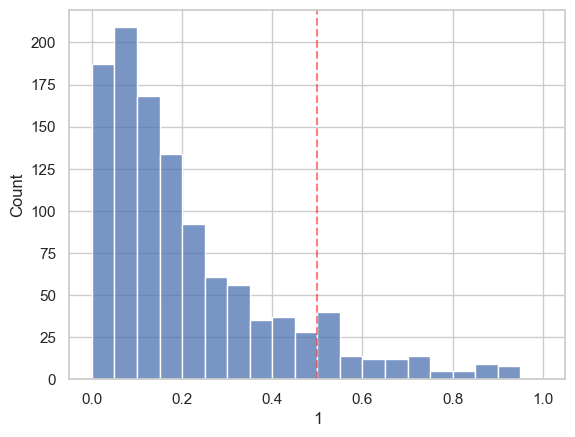

In [78]:
# Probabilidade de predizer se uma amostra pertence a classe 1
sns.histplot(pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])[1], bins=np.arange(0, 1.05, 0.05))

plt.axvline(0.5, ls='--', color='red', alpha=0.5)

In [79]:
data = pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])
data['target'] = y_test
data['limiar_0.5'] = data[1].apply(lambda x: 1 if x >= 0.5 else 0, 1)
data['limiar_0.9'] = data[1].apply(lambda x: 1 if x >= 0.9 else 0, 1)
data['limiar_0.3'] = data[1].apply(lambda x: 1 if x >= 0.3 else 0, 1)

In [80]:
# Observando se há melhoria do modelo
print('limiar: 0.3')
display((data['target'] == data['limiar_0.3']).value_counts())

print('-'*42)
print('limiar: 0.5')
display((data['target'] == data['limiar_0.5']).value_counts())

print('-'*42)
print('limiar: 0.9')
display((data['target'] == data['limiar_0.9']).value_counts())

limiar: 0.3


True     829
False    298
Name: count, dtype: int64

------------------------------------------
limiar: 0.5


True     879
False    248
Name: count, dtype: int64

------------------------------------------
limiar: 0.9


True     880
False    247
Name: count, dtype: int64

[LightGBM] [Info] Number of positive: 588, number of negative: 2040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 2628, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223744 -> initscore=-1.243978
[LightGBM] [Info] Start training from score -1.243978
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       875
           1       0.55      0.23      0.32       252

    accuracy                           0.79      1127
   macro avg       0.68      0.59      0.60      1127
weighted avg       0.75      0.79      0.75      1127



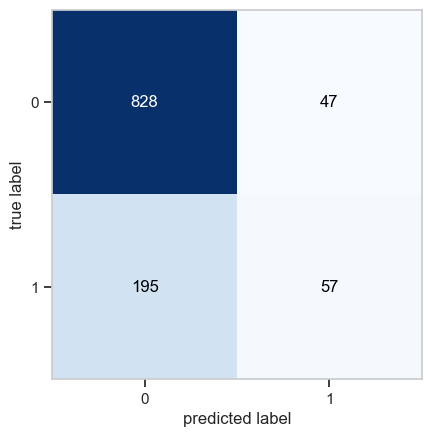

In [81]:
import lightgbm as lgb

model_lgb = lgb.LGBMClassifier(random_state=42)

model_lgb.fit(X_train, y_train)

y_pred = model_lgb.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_12104\2155836127.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(predict_xgb, bins=bins, palette='tab10', alpha=0.6, label='XGBoost')
C:\Users\ricar\AppData\Local\Temp\ipykernel_12104\2155836127.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(predict_lgb, bins=bins, palette='tab10', alpha=0.6, label='LGBM')


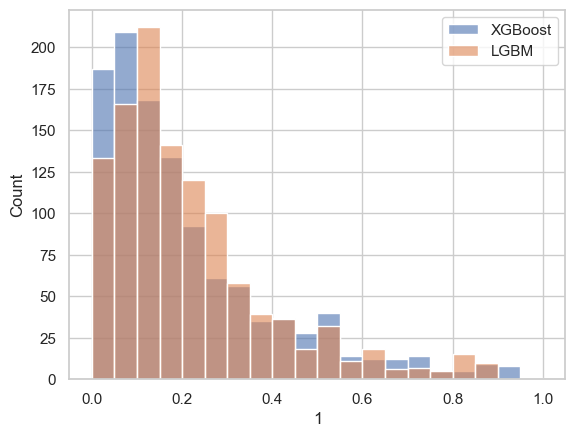

In [82]:
predict_xgb = pd.DataFrame(model.predict_proba(X_test), columns=[0, 1])[1]
predict_lgb = pd.DataFrame(model_lgb.predict_proba(X_test), columns=[0, 1])[1]

bins = np.arange(0, 1.05, 0.05)
sns.histplot(predict_xgb, bins=bins, palette='tab10', alpha=0.6, label='XGBoost')
sns.histplot(predict_lgb, bins=bins, palette='tab10', alpha=0.6, label='LGBM')

plt.legend()
# plt.axvline(0.9, ls='--', color='red', alpha=0.5)

In [83]:
from sklearn import metrics


def test_models_plot_roc_auc_curve(
        model_list,
        X_train,
        X_test,
        y_train,
        y_test):
    """
        model_list: Lista de modelos a serem testados
                    Formato (List[Dict[model_name|estimator, name|Model]])
        X_train: Dados de treino (features)
        X_test: Dados de teste (features)
        y_train: Dados de treino (alvo)
        y_test: Dados de teste (alvo)
    """

    response = {}
    for mdl in model_list:
        model = mdl.get('estimator')
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)


        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

        model_name = mdl.get('model_name')
        accuracy = metrics.accuracy_score(y_test, y_predict)
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        precision = metrics.precision_score(y_test, y_predict, average='weighted')
        recall = metrics.recall_score(y_test, y_predict, average='weighted')
        f1_score = metrics.f1_score(y_test, y_predict, average='weighted')
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl.get('model_name'), auc))

        print(f"Model      : {model_name}")
        print(f"Accuracy   : {accuracy:.4f} ")
        print(f"Precision  : {precision:.4f}")
        print(f"Recall     : {recall:.4f}")
        print(f"F1 - Score : {f1_score:.4f} ")
        print(f"ROC - AUC  : {auc:.4f} ")
        print("======================")

        response[mdl.get('model_name')]  = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1_score": f1_score,
            "auc": auc,
        }


    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()
    return response

In [84]:
from lightgbm.sklearn import LGBMClassifier

random_seed = 42

list_models = [
  {
      "model_name": "Decision Tree",
      "estimator": DecisionTreeClassifier(random_state=random_seed)
  },
  {
      "model_name": "Random Forest",
      "estimator": RandomForestClassifier(random_state=random_seed)
  },
  {
      "model_name": "AdaBoost",
      "estimator": AdaBoostClassifier(random_state=random_seed)
  },
  {
      "model_name": "GradientBoosting",
      "estimator": GradientBoostingClassifier(random_state=random_seed)
  },
  {
      "model_name": "XGBoost",
      "estimator": XGBClassifier(random_state=random_seed)
  },
  {
      "model_name": "LightGBM",
      "estimator": lgb.LGBMClassifier(random_state=random_seed)
  },
  {
      "model_name": "LightGBM - Opt",
      "estimator": lgb.LGBMClassifier(random_state=random_seed, num_leaves=17, min_child_samples= 10)
  }
]

Model      : Decision Tree
Accuracy   : 0.7436 
Precision  : 0.7295
Recall     : 0.7436
F1 - Score : 0.7356 
ROC - AUC  : 0.6032 
Model      : Random Forest
Accuracy   : 0.7799 
Precision  : 0.7565
Recall     : 0.7799
F1 - Score : 0.7630 
ROC - AUC  : 0.6238 
Model      : AdaBoost
Accuracy   : 0.7711 
Precision  : 0.6473
Recall     : 0.7711
F1 - Score : 0.6793 
ROC - AUC  : 0.4994 
Model      : GradientBoosting
Accuracy   : 0.7897 
Precision  : 0.7662
Recall     : 0.7897
F1 - Score : 0.7275 
ROC - AUC  : 0.5510 
Model      : XGBoost
Accuracy   : 0.7799 
Precision  : 0.7454
Recall     : 0.7799
F1 - Score : 0.7486 
ROC - AUC  : 0.5899 
[LightGBM] [Info] Number of positive: 588, number of negative: 2040
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 2628, number of used features: 9
[Lig

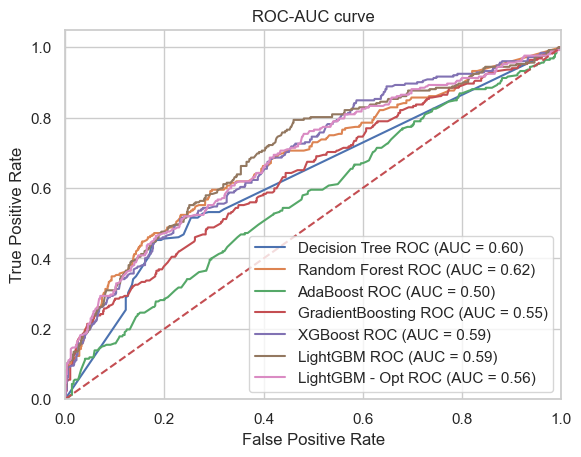

In [85]:
pipeline_response = test_models_plot_roc_auc_curve(
    list_models,
    X_train,
    X_test,
    y_train,
    y_test
)

In [86]:
resp = []
for modelo, modelo_metricas  in pipeline_response.items():
  metricas = []
  metricas.append(modelo)
  for metrica in modelo_metricas.values():
    metricas.append(metrica)
  resp.append(metricas)

In [87]:
# Métricas dos Modelos
metricas_df = pd.DataFrame(resp, columns=['modelo'] + list(pipeline_response['Decision Tree'].keys()))
metricas_df

,modelo,accuracy,precision,recall,f1_score,auc
0,Decision Tree,0.743567,0.729468,0.743567,0.735608,0.603175
1,Random Forest,0.779947,0.756469,0.779947,0.762981,0.623778
2,AdaBoost,0.771074,0.647350,0.771074,0.679254,0.499397
3,GradientBoosting,0.789707,0.766168,0.789707,0.727545,0.550952
4,XGBoost,0.779947,0.745435,0.779947,0.748622,0.589873
5,LightGBM,0.785271,0.750955,0.785271,0.749008,0.586238
6,LightGBM - Opt,0.793256,0.770186,0.793256,0.738386,0.564540


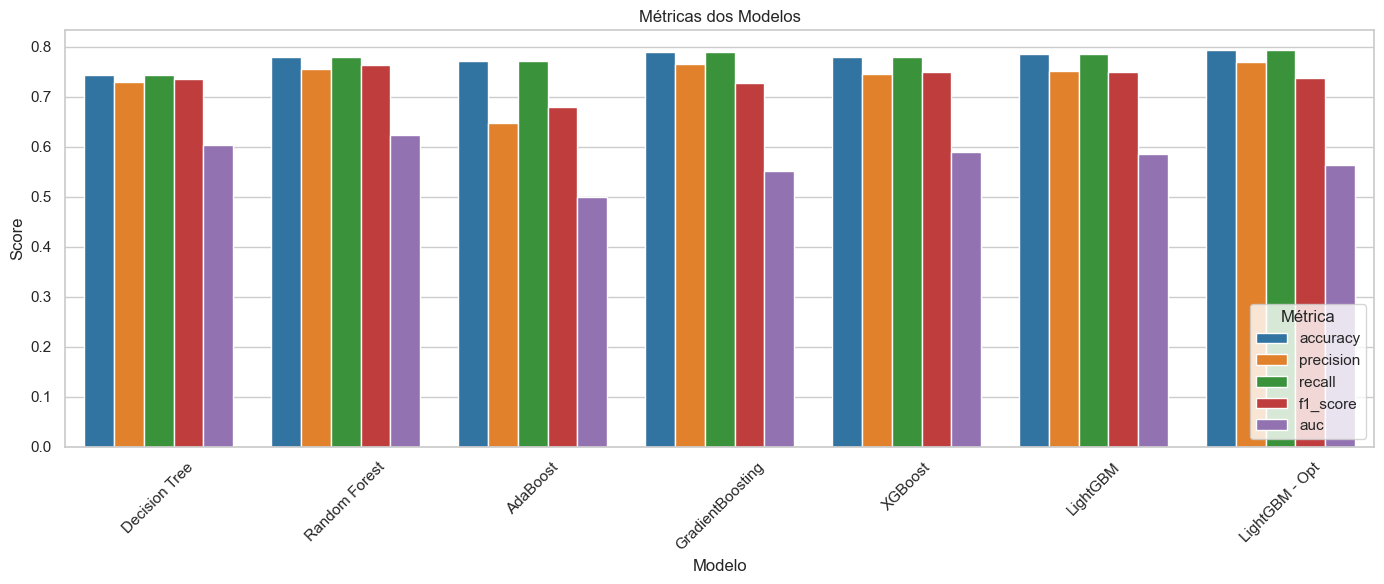

In [88]:
# Métricas dos Modelos - gráfico
df_melted = pd.melt(metricas_df, id_vars=["modelo"], var_name="metrica", value_name="valor")

sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='modelo', y='valor', hue='metrica', palette='tab10')

plt.xticks(rotation=45) 
plt.xlabel("Modelo")
plt.ylabel("Score")
plt.title("Métricas dos Modelos")
plt.legend(title="Métrica", loc='lower right')  # Posição da legenda
plt.tight_layout()
plt.show()

In [89]:
# Calculando a média das métricas para cada modelo
metricas_df['media'] = metricas_df[['accuracy', 'precision', 'recall', 'f1_score', 'auc']].mean(axis=1)

# Encontrando o modelo com a melhor média
melhor_modelo = metricas_df.loc[metricas_df['media'].idxmax()]

print("Melhor modelo em média:")
print(melhor_modelo)

Melhor modelo em média:
modelo       Random Forest
accuracy          0.779947
precision         0.756469
recall            0.779947
f1_score          0.762981
auc               0.623778
media             0.740624
Name: 1, dtype: object


### Referência: 

<img src="https://i.imgur.com/Y5GdXdF.png" width=650>

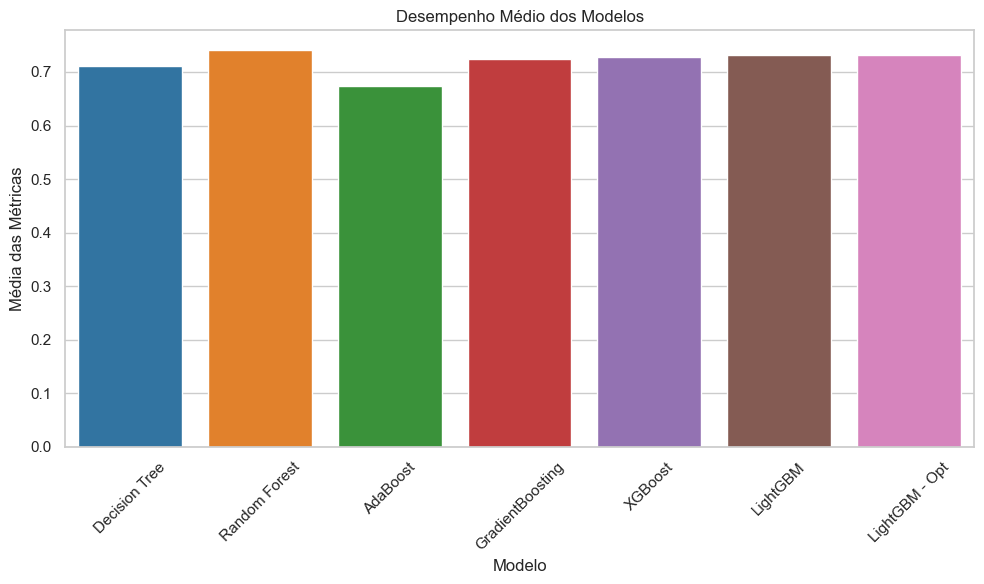

In [90]:
# Desempenho Médio dos Modelos
plt.figure(figsize=(10, 6))

sns.barplot(data=metricas_df, x='modelo', y='media', palette='tab10')

plt.xticks(rotation=45) 
plt.xlabel("Modelo")
plt.ylabel("Média das Métricas")
plt.title("Desempenho Médio dos Modelos")
plt.tight_layout()
plt.show()

**Comparando resultados com Get get_dummies e LabelEncoder**

### Utilizando get_dummies:


<img src="https://i.imgur.com/8iytgwJ.png" width=420>

### Utiliando LabelEncoder:

<img src="https://i.imgur.com/ekttyRC.png" width=420>

Podemos observar uma pequena melhora utilizando o get_dummies, porem com o "auc" um pouco mais baixo.

# Validação de Modelos

In [91]:
df = df_original.copy()

In [92]:
# Dropando a target das nossas features
X = df.drop(['job_title'], axis = 1)

In [93]:
# Fazenfo um get_dummies para colunar as nossas variáveis categóricas
X_with_dummies = pd.get_dummies(X, prefix_sep = '_', columns=['experience_level',
                                                              'employment_type',
                                                              'employee_residence',
                                                              'salary_currency',
                                                              'company_location',
                                                              'company_size'])

In [94]:
# transformando a target
y_target = np.where(df['job_title'].str.contains('Data Scientist|Data Science', case=False, regex=True), 1, 0)
y_target

array([1, 0, 0, ..., 1, 0, 1])

In [95]:
#Separando em train e test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_with_dummies,
                                                    y_target,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify = y_target)

In [96]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [97]:
X_test_std = scaler.transform(X_test)

In [98]:
# Testando com o modelo RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)

In [99]:
X_train_std.shape

(2628, 185)

In [100]:
print(f'Separando para validação em cada fold: {31647 // 5} amostras')
print(f'Separando para treino em cada fold:    {31647 - (31647 // 5)} amostras')

Separando para validação em cada fold: 6329 amostras
Separando para treino em cada fold:    25318 amostras


In [101]:
from sklearn.model_selection import cross_val_score, cross_validate

eval_metrics = ['accuracy', 'recall', 'precision', 'f1']

# Obtendo a acurácia de acordo com o `fold`
print(cross_val_score(
    model,
    X_train_std, # Dados de treino
    y_train,
    scoring='accuracy',
    cv=5 # Quantidade de `folds` (Quantidade de sub-amostras para validação)
    ))


[0.75095057 0.74144487 0.74144487 0.77714286 0.70666667]


In [102]:
rf_cross_val = cross_validate(
    model,
    X_train_std, # Dados de treino
    y_train,
    scoring=eval_metrics, # Lista de métricas para avaliar
    cv=5 # Quantidade de `folds` (Quantidade de sub-amostras para validação)
)

In [103]:
rf_cross_val

{'fit_time': array([0.68803978, 0.66804314, 0.69139338, 0.68607998, 0.70285106]),
 'score_time': array([0.02497196, 0.02097797, 0.02097893, 0.02197862, 0.02197838]),
 'test_accuracy': array([0.75095057, 0.74144487, 0.74144487, 0.77714286, 0.70666667]),
 'test_recall': array([0.39568345, 0.3115942 , 0.4057971 , 0.38405797, 0.34782609]),
 'test_precision': array([0.53921569, 0.51190476, 0.50909091, 0.62352941, 0.42857143]),
 'test_f1': array([0.45643154, 0.38738739, 0.4516129 , 0.47533632, 0.384     ])}

In [104]:
pd.DataFrame(rf_cross_val)

,fit_time,score_time,test_accuracy,test_recall,test_precision,test_f1
0,0.688040,0.024972,0.750951,0.395683,0.539216,0.456432
1,0.668043,0.020978,0.741445,0.311594,0.511905,0.387387
2,0.691393,0.020979,0.741445,0.405797,0.509091,0.451613
3,0.686080,0.021979,0.777143,0.384058,0.623529,0.475336
4,0.702851,0.021978,0.706667,0.347826,0.428571,0.384000


In [105]:
pd.DataFrame(rf_cross_val).describe().T

,count,mean,std,min,25%,50%,75%,max
fit_time,5.0,0.687281,0.012564,0.668043,0.686080,0.688040,0.691393,0.702851
score_time,5.0,0.022177,0.001640,0.020978,0.020979,0.021978,0.021979,0.024972
test_accuracy,5.0,0.743530,0.025261,0.706667,0.741445,0.741445,0.750951,0.777143
test_recall,5.0,0.368992,0.038848,0.311594,0.347826,0.384058,0.395683,0.405797
test_precision,5.0,0.522462,0.070002,0.428571,0.509091,0.511905,0.539216,0.623529
test_f1,5.0,0.430954,0.042274,0.384000,0.387387,0.451613,0.456432,0.475336


# Agora testando o _Stratified K-Fold_:

In [106]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5) # 5 Folds
kf.get_n_splits(X_train_std)

5

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [108]:
for i, (train_index, val_index) in enumerate(kf.split(X_train_std, y_train), start=1):
  print(i)
  print(f'Primeiro idx train: {train_index[0]}, último idx train: {train_index[-1]}')
  print(f'Primeiro idx val: {val_index[0]}, último idx val: {val_index[-1]}')
  print('-' * 46)

1
Primeiro idx train: 523, último idx train: 2627
Primeiro idx val: 0, último idx val: 537
----------------------------------------------
2
Primeiro idx train: 0, último idx train: 2627
Primeiro idx val: 523, último idx val: 1060
----------------------------------------------
3
Primeiro idx train: 0, último idx train: 2627
Primeiro idx val: 1050, último idx val: 1632
----------------------------------------------
4
Primeiro idx train: 0, último idx train: 2627
Primeiro idx val: 1558, último idx val: 2135
----------------------------------------------
5
Primeiro idx train: 0, último idx train: 2135
Primeiro idx val: 2089, último idx val: 2627
----------------------------------------------


In [109]:
list_accuracy = []
list_precision = []
list_recall = []
list_f1 = []

for i, (train_index, val_index) in enumerate(kf.split(X_train_std, y_train), start=1):
  print('='*30)
  print('Fold', i)
  print('Train index', train_index, 'Validation index', val_index)

  # Selecionando as amostras entre treino e validação de acordo com os indices de cada fold
  KFold_X_train, KFold_X_val = X_train_std[train_index], X_train_std[val_index]
  KFold_y_train, KFold_y_val = y_train[train_index], y_train[val_index]

  # Treinando o modelo com o `fold` de treino
  model.fit(KFold_X_train, KFold_y_train)

  # Predizendo com os dados de validação
  y_pred = model.predict(KFold_X_val)

  # Coletando as métricas
  acc = accuracy_score(KFold_y_val, y_pred)
  prec = precision_score(KFold_y_val, y_pred)
  recall = recall_score(KFold_y_val, y_pred)
  f1 = f1_score(KFold_y_val, y_pred)

  print("Accuracy: ", acc)
  print("Precison: ", prec)
  print("Recal:    ", recall)
  print("F1-Score: ", f1)
  list_accuracy.append(acc)
  list_precision.append(prec)
  list_recall.append(recall)
  list_f1.append(f1)
print('='*30)

Fold 1
Train index [ 523  524  525 ... 2625 2626 2627] Validation index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228

Accuracy:  0.7509505703422054
Precison:  0.5392156862745098
Recal:     0.39568345323741005
F1-Score:  0.45643153526970953
Fold 2
Train index [   0    1    2 ... 2625 2626 2627] Validation index [ 523  524  525  526  527  528  529  530  532  533  534  535  538  539
  540  541  542  543  544  545  546  547  548  549  550  551  552  553
  554  555  556  557  558  559  560  561  562  563  564  565  566  567
  568  569  570  571  572  573  574  575  576  577  578  579  580  581
  582  583  584  585  586  587  588  589  590  591  592  593  594  595
  596  597  598  599  600  601  602  603  604  605  606  607  608  609
  610  611  612  613  614  615  616  617  618  619  620  621  622  623
  624  625  626  627  628  629  630  631  632  633  634  635  636  637
  638  639  640  641  642  643  644  645  646  647  648  649  650  651
  652  653  654  655  656  657  658  659  660  661  662  663  664  665
  666  667  668  669  670  671  672  673  674  675  676  677  678  679
  680  681  682  683  684

In [110]:
pd.DataFrame(
    {
        'acc': list_accuracy,
        'precision': list_precision,
        'recall': list_recall,
        'F1': list_f1}
).describe().T[['mean', '50%', 'std', 'min', 'max']]

,mean,50%,std,min,max
acc,0.743530,0.741445,0.025261,0.706667,0.777143
precision,0.522462,0.511905,0.070002,0.428571,0.623529
recall,0.368992,0.384058,0.038848,0.311594,0.405797
F1,0.430954,0.451613,0.042274,0.384000,0.475336


# Pipeline

In [111]:
df = df_original.copy()

In [112]:
# Dropando a target das nossas features
X = df.drop(['job_title'], axis = 1)

In [113]:
# Fazenfo um get_dummies para colunar as nossas variáveis categóricas
X_with_dummies = pd.get_dummies(X, prefix_sep = '_', columns=['experience_level',
                                                              'employment_type',
                                                              'employee_residence',
                                                              'salary_currency',
                                                              'company_location',
                                                              'company_size'])

In [114]:
# transformando a target
y_target = np.where(df['job_title'].str.contains('Data Scientist|Data Science', case=False, regex=True), 1, 0)
y_target

array([1, 0, 0, ..., 1, 0, 1])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_with_dummies,
                                                    y_target,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y_target)

In [116]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# O que queremos utilizar para construir o pipeline?
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Podemos adicionar vários passos de pré-processamento (métodos do scikit-learn que contêm o `fit_transform`)
# Sempre no final precisamos de um modelo de predição seja de classificação, seja para regressão.
pipeline = Pipeline(
    [
        ('Imputação pela média dados faltantes', SimpleImputer(missing_values=np.nan, strategy='median')),
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(n_estimators=300))
    ]
)
# Treinando os dados pelo pipeline
pipeline.fit(X_train, y_train)

# Predição com o pipeline
y_pred = pipeline.predict(X_test)

In [117]:
from sklearn import set_config
set_config(display='diagram')

In [118]:
pipeline

Pipeline(steps=[('Imputação pela média dados faltantes',
                 SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model', RandomForestClassifier(n_estimators=300))])

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       554
           1       0.53      0.44      0.48       197

    accuracy                           0.75       751
   macro avg       0.67      0.65      0.66       751
weighted avg       0.74      0.75      0.74       751



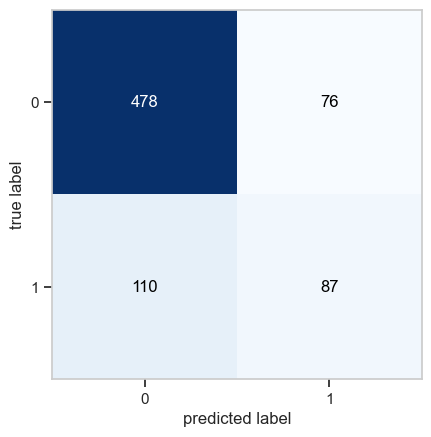

In [120]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

# Hiperparâmetros

In [121]:
df = df_original.copy()

In [122]:
# Dropando a target das nossas features
X = df.drop(['job_title'], axis = 1)

In [123]:
# Fazenfo um get_dummies para colunar as nossas variáveis categóricas
X_with_dummies = pd.get_dummies(X, prefix_sep = '_', columns=['experience_level',
                                                              'employment_type',
                                                              'employee_residence',
                                                              'salary_currency',
                                                              'company_location',
                                                              'company_size'])

In [124]:
# transformando a target
y_target = np.where(df['job_title'].str.contains('Data Scientist|Data Science', case=False, regex=True), 1, 0)
y_target

array([1, 0, 0, ..., 1, 0, 1])

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X_with_dummies, y_target,
    test_size=0.3,
    random_state=42,
    stratify=y_target)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.7453416149068323


In [126]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=500, num=3)]
max_depth = [int(x) for x in np.linspace(10, 30, num=3)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
  "n_estimators": n_estimators,
  "max_depth": max_depth,
  "min_samples_split": min_samples_split,
  "min_samples_leaf": min_samples_leaf,
}

In [127]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model, # Modelo
    param_grid = params_grid,
    scoring='accuracy',
    cv=3, # Número folds para validação cruzada
    verbose=2,
    n_jobs=-1
)

In [128]:
%%time
# Já estamos fazendo a validação cruzada
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


CPU times: total: 3.91 s
Wall time: 1min 7s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 350, 500]},
             scoring='accuracy', verbose=2)

In [129]:
grid_search.cv_results_

{'mean_fit_time': array([0.94253651, 1.59667738, 2.31211019, 0.89727267, 1.56272443,
        2.32660047, 0.85313702, 1.57518029, 2.22630239, 0.81884654,
        1.42563534, 2.02958528, 0.84096781, 1.41961757, 2.0326035 ,
        0.80132794, 1.33901898, 1.9664638 , 0.69906354, 1.31669315,
        1.94166835, 0.86227647, 1.3373278 , 1.80126309, 0.70578822,
        1.28873038, 1.90644264, 1.96122646, 3.304298  , 4.66352352,
        1.62077554, 2.96564237, 4.10178336, 1.43139791, 2.43192482,
        3.57994191, 1.11921239, 1.8604966 , 2.61591347, 1.0295047 ,
        1.81699491, 2.4451685 , 0.92684221, 1.8578701 , 2.56524984,
        0.81025267, 1.37315432, 1.89076042, 0.77218302, 1.51517447,
        1.95796426, 0.79947718, 1.31551433, 2.04833055, 2.23896925,
        3.76630314, 5.42556707, 1.87734675, 3.24495236, 4.81433336,
        1.52241143, 2.93971968, 4.18590101, 1.07424712, 1.87547596,
        2.72351162, 1.10093753, 1.90662885, 2.52083254, 0.98535403,
        1.69203949, 2.40533225,

In [130]:
print(grid_search.cv_results_['mean_test_score'].mean())

0.7390072721122951


In [131]:
# Melhor parâmetro grid_search
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [132]:
cvs = pd.DataFrame(grid_search.cv_results_)

cvs.T

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
mean_fit_time,0.942537,1.596677,2.31211,0.897273,1.562724,2.3266,0.853137,1.57518,2.226302,0.818847,...,2.405332,0.773823,1.324504,1.994076,0.748511,1.385426,1.953092,0.748665,1.454239,1.964999
std_fit_time,0.018589,0.018288,0.019406,0.031275,0.011666,0.004292,0.011158,0.019628,0.071873,0.033884,...,0.020026,0.017742,0.006937,0.05331,0.035039,0.019209,0.05118,0.017084,0.057809,0.058489
mean_score_time,0.056615,0.091106,0.127569,0.054454,0.089432,0.159864,0.057777,0.096082,0.124389,0.046297,...,0.127552,0.046292,0.085601,0.117731,0.05096,0.075933,0.110569,0.055125,0.071762,0.085087
std_score_time,0.007474,0.003689,0.009665,0.000816,0.000407,0.011667,0.008245,0.004899,0.009541,0.001934,...,0.008211,0.004113,0.015458,0.015115,0.007788,0.003481,0.004023,0.000626,0.005098,0.013743
param_max_depth,10,10,10,10,10,10,10,10,10,10,...,30,30,30,30,30,30,30,30,30,30
param_min_samples_leaf,1,1,1,1,1,1,1,1,1,2,...,2,4,4,4,4,4,4,4,4,4
param_min_samples_split,2,2,2,5,5,5,10,10,10,2,...,10,2,2,2,5,5,5,10,10,10
param_n_estimators,200,350,500,200,350,500,200,350,500,200,...,500,200,350,500,200,350,500,200,350,500
params,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 1, 'min_...","{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",...,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_...","{'max_depth': 30, 'min_samples_leaf': 4, 'min_..."
split0_test_score,0.738584,0.739726,0.739726,0.737443,0.737443,0.738584,0.737443,0.738584,0.738584,0.738584,...,0.738584,0.736301,0.736301,0.736301,0.736301,0.736301,0.736301,0.736301,0.736301,0.736301


In [133]:
cvs.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,81.0,1.879675,1.006958,0.699064,1.119212,1.801263,2.238969,5.425567
std_fit_time,81.0,0.054367,0.046515,0.004292,0.021636,0.042197,0.065309,0.267761
mean_score_time,81.0,0.096169,0.038692,0.040964,0.061446,0.088248,0.123720,0.205804
std_score_time,81.0,0.008848,0.006147,0.000407,0.004113,0.007373,0.013644,0.028332
split0_test_score,81.0,0.738599,0.004058,0.724886,0.736301,0.738584,0.739726,0.751142
split1_test_score,81.0,0.739853,0.005854,0.734018,0.736301,0.737443,0.739726,0.757991
split2_test_score,81.0,0.738570,0.004452,0.726027,0.737443,0.737443,0.740868,0.752283
mean_test_score,81.0,0.739007,0.003692,0.730594,0.737062,0.737443,0.739346,0.750761
std_test_score,81.0,0.002292,0.002220,0.000538,0.000932,0.001424,0.002691,0.009701
rank_test_score,81.0,36.197531,20.039598,1.000000,21.000000,40.000000,51.000000,81.000000


In [134]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [135]:
cvs.sort_values('rank_test_score').head().T

,32,33,35,31,34
mean_fit_time,4.101783,1.431398,3.579942,2.965642,2.431925
std_fit_time,0.15827,0.042197,0.045729,0.069531,0.106205
mean_score_time,0.169506,0.074426,0.205804,0.13153,0.125876
std_score_time,0.013684,0.012447,0.014339,0.004779,0.020307
param_max_depth,20,20,20,20,20
param_min_samples_leaf,1,1,1,1,1
param_min_samples_split,5,10,10,5,10
param_n_estimators,500,200,500,350,350
params,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...","{'max_depth': 20, 'min_samples_leaf': 1, 'min_...","{'max_depth': 20, 'min_samples_leaf': 1, 'min_...","{'max_depth': 20, 'min_samples_leaf': 1, 'min_...","{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
split0_test_score,0.75,0.748858,0.751142,0.747717,0.748858


In [136]:
cvs[cvs.rank_test_score == 1].sort_values('mean_fit_time').iloc[0].params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [137]:
model_gs = RandomForestClassifier(**grid_search.best_params_)

In [138]:
model_gs

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500)

In [139]:
# Fazendo o treinamento do modelo com TODOS os dados de treino após a validação e seleção dos hiperparâmetros
model_gs.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500)

In [140]:
y_pred_gs = model_gs.predict(X_test)

In [141]:
acc_grid = accuracy_score(y_test, y_pred_gs)
print(acc_grid)
print(acc)

0.7524401064773736
0.7453416149068323


# Aplicando agora o __RandomizedSearchCV__:

In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params_grid,
    n_iter=100, # Quantas rodadas para teste
    cv=3,
    verbose=2,
    n_jobs=-1
)

In [144]:
%%time
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


C:\Users\ricar\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: total: 21 s
Wall time: 1min 13s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 350, 500]},
                   verbose=2)

In [145]:
print(random_search.cv_results_['mean_test_score'].mean())

0.7390072721122951


In [146]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [147]:
model_rs = RandomForestClassifier(**random_search.best_params_)
model_rs

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500)

In [148]:
model_rs.fit(X_train, y_train)
y_pred_rs = model_rs.predict(X_test)

In [149]:
print(accuracy_score(y_test, y_pred_rs))

0.7524401064773736


In [150]:
acc_random = accuracy_score(y_test, y_pred_rs)

In [151]:
print("Comparação das Acurácias: ")
print('Acurácia sem Otimização:         ', np.round(acc, 3))
print('Acurácia com GridSearchCV:       ', np.round(acc_grid, 3))
print('Acurácia com RandomizedSearchCV: ', np.round(acc_random, 3))

Comparação das Acurácias: 
Acurácia sem Otimização:          0.745
Acurácia com GridSearchCV:        0.752
Acurácia com RandomizedSearchCV:  0.752
